In [37]:
import os
import librosa
import numpy as np
import soundfile
import IPython

In [38]:
count_clean = 0
duration_clean = 0
duration_noise = 0
sample_rate=8000

for i in os.listdir('clean_speech'):
  count_clean += 1
  y,sr = librosa.load(os.path.join('clean_speech',i),sr=sample_rate)
  duration = librosa.get_duration(y=y,sr=sr)
  duration_clean+=duration

print(f'Number of clean audio files are {count_clean}')
print(f'Total duration of all clean audios {duration_clean//60}')

count_noise = 0
for i in os.listdir('noise'):
  count_noise += 1
  y,sr = librosa.load(os.path.join('noise',i),sr=sample_rate)
  duration = librosa.get_duration(y=y,sr=sr)
  duration_noise+=duration

print(f'Number of Noisy audio files are {count_noise}')
print(f'Total duration of all noise audios {duration_noise//60}')

Number of clean audio files are 2703
Total duration of all clean audios 323.0
Number of Noisy audio files are 2000
Total duration of all noise audios 166.0


In [39]:
def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):


    sequence_sample_length = sound_data.shape[0]

    sound_data_list = [sound_data[start:start + frame_length] for start in range(
    0, sequence_sample_length - frame_length + 1, hop_length_frame)]  

    sound_data_array = np.vstack(sound_data_list)
    return sound_data_array
     

In [40]:

noise_dir="noise/"
voice_dir="clean_speech/"
path_save_spectrogram="spectogram/"
sample_rate=8000
min_duration=1.0  
frame_length=8064
hop_length_frame=8064
hop_length_frame_noise=5000
nb_samples=500
n_fft=255
hop_length_fft=63
dim_square_spec = int(n_fft / 2) + 1

In [41]:

clean_audio_files = os.listdir(voice_dir)

clean_random_audio = np.random.choice(clean_audio_files)

y,sr = librosa.load(os.path.join(voice_dir,clean_random_audio),sr=sample_rate)

clean = audio_to_audio_frame_stack(y,frame_length,hop_length_frame)
print("Clean Audio: {}".format(clean_random_audio))
print("Shape:{}".format(clean.shape))

Clean Audio: 174-168635-0001.flac
Shape:(4, 8064)


In [42]:

noisy_audio_files = os.listdir(voice_dir)

noisy_random_audio = np.random.choice(clean_audio_files)

y,sr = librosa.load(os.path.join(voice_dir,noisy_random_audio),sr=sample_rate)

noise = audio_to_audio_frame_stack(y,frame_length,hop_length_frame)
print("Noise Audio: {}".format(noisy_random_audio))
print("Shape:{}".format(noise.shape))

Noise Audio: 5694-64038-0025.flac
Shape:(6, 8064)


In [43]:
clean = np.vstack(clean)
noise = np.vstack(noise)
print(clean)
print(noise)

[[-0.00179697 -0.00250162 -0.00247102 ... -0.00804296  0.00302564
   0.01852628]
 [ 0.01909344  0.00216248 -0.01612411 ...  0.24325915 -0.01013109
  -0.19866285]
 [-0.29323015 -0.20839866  0.02215427 ... -0.00588175 -0.00345196
  -0.00252968]
 [-0.00589184 -0.00289474 -0.00092163 ... -0.00702982 -0.01379403
  -0.0112903 ]]
[[-5.2063991e-05 -5.0664370e-05 -6.0848084e-05 ...  1.2094702e-01
   7.4672103e-02  5.9967905e-02]
 [ 9.2401288e-02  7.8174293e-02  5.3146027e-02 ... -2.8310642e-02
  -4.6437502e-02 -6.4018689e-02]
 [-8.3944656e-02 -9.7730748e-02 -1.1459232e-01 ...  9.8942891e-03
  -1.7510325e-02 -1.8808896e-02]
 [ 5.2558929e-03  3.7521183e-02  5.7180926e-02 ...  2.0670723e-02
  -2.4336688e-02  2.4139680e-02]
 [-9.9021513e-03  8.5181929e-04  3.2587163e-04 ...  3.5273358e-03
   4.9760982e-02  1.5982407e-01]
 [ 1.8305010e-01  9.6757829e-02  1.2404723e-01 ...  2.4355017e-04
   8.9585874e-04  1.2828194e-03]]


In [44]:
def blend_noise_randomly(voice, noise, nb_samples, frame_length):


    prod_voice = np.zeros((nb_samples, frame_length))
    prod_noise = np.zeros((nb_samples, frame_length))
    prod_noisy_voice = np.zeros((nb_samples, frame_length))

    for i in range(nb_samples):
        id_voice = np.random.randint(0, voice.shape[0])
        id_noise = np.random.randint(0, noise.shape[0])
        level_noise = np.random.uniform(0.2, 0.8)
        prod_voice[i, :] = voice[id_voice, :]
        prod_noise[i, :] = level_noise * noise[id_noise, :]
        prod_noisy_voice[i, :] = prod_voice[i, :] + prod_noise[i, :]

    return prod_voice, prod_noise, prod_noisy_voice

In [45]:
prod_voice, prod_noise,prod_noisy_voice = blend_noise_randomly(voice=clean,noise=noise,nb_samples=10,frame_length=frame_length)
     

In [46]:

prod_voice.shape

(10, 8064)

In [47]:
samples_clean = []
samples_noisy_clean = []
for x in prod_voice:
  samples_clean.extend(x)

for x in prod_noisy_voice:
  samples_noisy_clean.extend(x)

In [48]:


len(samples_clean)
     

80640

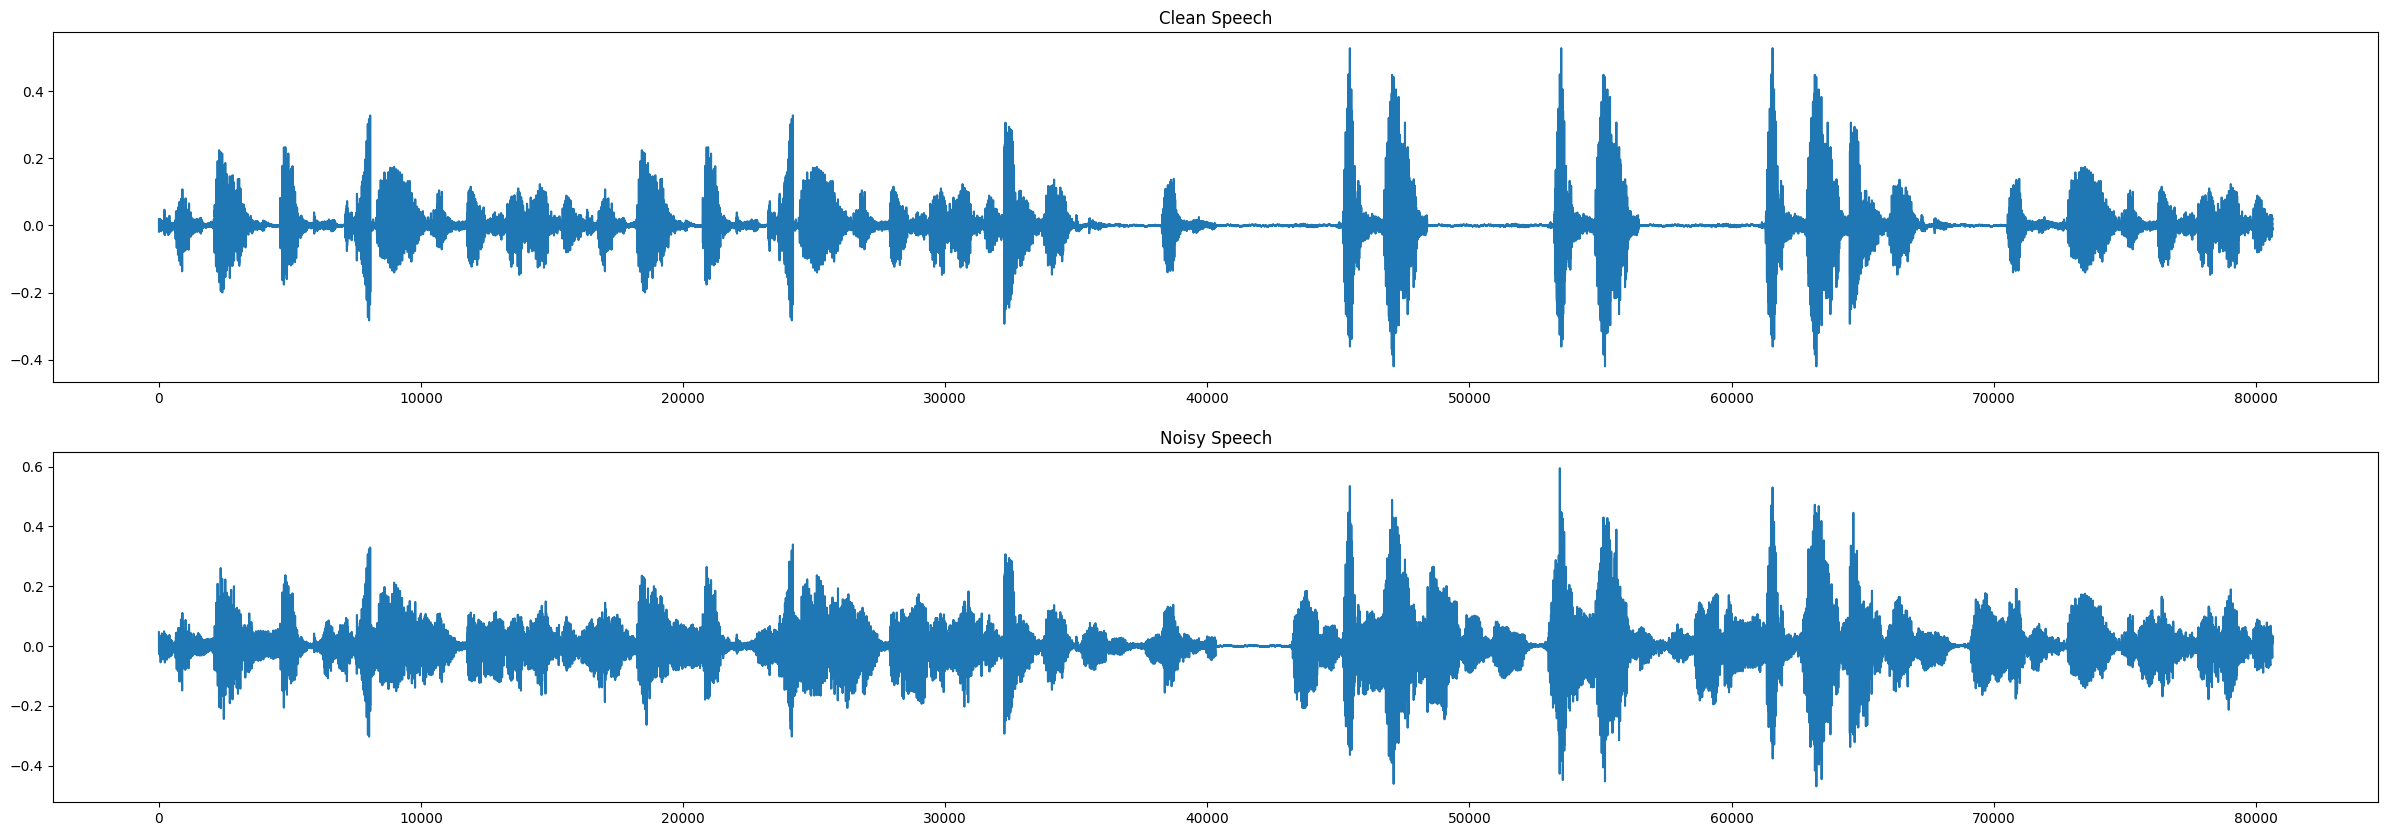

In [49]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.subplot(211)
plt.title("Clean Speech")
plt.plot(samples_clean)

plt.subplot(212)
plt.title("Noisy Speech")
plt.plot(samples_noisy_clean)

plt.show()

In [50]:


import soundfile as sf
clean_nb_samples = prod_voice.shape[0]

clean_long = prod_voice.reshape(1, 10 * frame_length)*10

sf.write("clean_long.wav", clean_long[0,:], 8000, 'PCM_24')
     

In [51]:

from IPython.display import Audio
Audio('clean_long.wav')

In [52]:

noise_nb_samples = prod_noisy_voice.shape[0]

noise_long = prod_noisy_voice.reshape(1, 10 * frame_length)*10

sf.write("noise_long.wav", noise_long[0,:], 8000, 'PCM_24')

In [53]:

from IPython.display import Audio
Audio('noise_long.wav')

In [54]:

def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
  
    
    stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
    stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)

    stftaudio_magnitude_db = librosa.amplitude_to_db(
        stftaudio_magnitude, ref=np.max)

    return stftaudio_magnitude_db, stftaudio_phase

In [55]:
def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):
    

    

    nb_audio = numpy_audio.shape[0]
    
    m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
    m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)

    for i in range(nb_audio):
        m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
            n_fft, hop_length_fft, numpy_audio[i])

    return m_mag_db, m_phase

In [56]:
def audio_files_to_numpy(audio_dir, list_audio_files, sample_rate, frame_length, hop_length_frame, min_duration):
   

    list_sound_array = []

    count = 0
    for file in list_audio_files:
    
      try:
        y, sr = librosa.load(os.path.join(audio_dir, file), sr=sample_rate)
        
        total_duration = librosa.get_duration(y=y, sr=sr)
      except ZeroDivisionError:
        count += 1

        
      if (total_duration >= min_duration):
          list_sound_array.append(audio_to_audio_frame_stack(
              y, frame_length, hop_length_frame))
      else:
          print(
              f"The following file {os.path.join(audio_dir,file)} is below the min duration")

    return np.vstack(list_sound_array)

In [57]:
#Data Prepare
def create_data(noise_dir, voice_dir,path_save_spectrogram, sample_rate,
min_duration, frame_length, hop_length_frame, hop_length_frame_noise, nb_samples, n_fft, hop_length_fft):

    list_noise_files = os.listdir(noise_dir)
    list_voice_files = os.listdir(voice_dir)

    def remove_ds_store(lst):
        """remove mac specific file if present"""
        if '.DS_Store' in lst:
            lst.remove('.DS_Store')

        return lst

    list_noise_files = remove_ds_store(list_noise_files)
    list_voice_files = remove_ds_store(list_voice_files)

    nb_voice_files = len(list_voice_files)
    nb_noise_files = len(list_noise_files)


  
    noise = audio_files_to_numpy(noise_dir, list_noise_files, sample_rate,
                                     frame_length, hop_length_frame_noise, min_duration)

    voice = audio_files_to_numpy(voice_dir, list_voice_files,
                                     sample_rate, frame_length, hop_length_frame, min_duration)

    
    prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(
            voice, noise, nb_samples, frame_length)


    dim_square_spec = int(n_fft / 2) + 1

   
    m_amp_db_voice,  m_pha_voice = numpy_audio_to_matrix_spectrogram(
            prod_voice, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noise,  m_pha_noise = numpy_audio_to_matrix_spectrogram(
            prod_noise, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noisy_voice,  m_pha_noisy_voice = numpy_audio_to_matrix_spectrogram(
            prod_noisy_voice, dim_square_spec, n_fft, hop_length_fft)

    np.save(path_save_spectrogram + 'voice_amp_db', m_amp_db_voice)
    np.save(path_save_spectrogram + 'noise_amp_db', m_amp_db_noise)               
    np.save(path_save_spectrogram + 'noisy_voice_amp_db', m_amp_db_noisy_voice)

In [58]:

!mkdir spectogram

A subdirectory or file spectogram already exists.


In [59]:
noise_dir="noise/"
voice_dir="clean_speech/"
path_save_spectrogram="spectogram/"
sample_rate=8000
min_duration=1.0  
frame_length=8064
hop_length_frame=8064
hop_length_frame_noise=5000
nb_samples=500
n_fft=255
hop_length_fft=63

In [60]:
create_data(noise_dir=noise_dir,voice_dir=voice_dir,
            path_save_spectrogram=path_save_spectrogram,
            sample_rate=sample_rate,min_duration=min_duration,frame_length=frame_length,hop_length_frame=hop_length_frame,hop_length_frame_noise=hop_length_frame_noise,nb_samples=nb_samples,n_fft=n_fft,hop_length_fft=hop_length_fft)
     

In [61]:
noisy_voice_amp_db = np.load('spectogram/noisy_voice_amp_db.npy')
print(np.shape(noisy_voice_amp_db))
     

(500, 128, 128)


In [62]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf
# print(tf.__version__)

#Unet network
def unet(input_size = (128,128,1)):
    #size filter input
    size_filter_in = 16
    #normal initialization of weights
    kernel_init = 'he_normal'
    #To apply leaky relu after the conv layer 
    activation_layer = None
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
    conv6 = LeakyReLU()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
    conv7 = LeakyReLU()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
    conv8 = LeakyReLU()(conv8)

    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['mae'])
    #model.summary()
    return model

In [63]:
def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec + 46)/50
    return matrix_spec
def scaled_ou(matrix_spec):
    "global scaling apply to noise models spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec -6 )/82
    return matrix_spec
     

In [64]:

noisy_voice = np.load("spectogram/noisy_voice_amp_db.npy")
voice = np.load("spectogram/voice_amp_db.npy")
noise = noisy_voice-voice

In [65]:


print(noisy_voice.shape)

print(noise.shape)

(500, 128, 128)
(500, 128, 128)


In [66]:


noisy_voice = noisy_voice[:,:,:]
noisy_voice = noisy_voice.reshape(noisy_voice.shape[0],noisy_voice.shape[1],noisy_voice.shape[2],1)

noise = noise[:,:,:]
noise = noise.reshape(noise.shape[0],noise.shape[1],noise.shape[2],1)

In [67]:

print(noisy_voice.shape)
print(noise.shape)

(500, 128, 128, 1)
(500, 128, 128, 1)


In [68]:
import matplotlib.pyplot as plt
import pandas
from tensorflow.keras.models import model_from_json
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def training_unet(path_save_spectrogram, weights_path, epochs, batch_size):
   
    
    X_in = np.load(path_save_spectrogram +'noisy_voice_amp_db'+".npy")
    X_ou = np.load(path_save_spectrogram +'voice_amp_db'+".npy")
  
    X_ou = X_in - X_ou

   
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

    
    X_in = scaled_in(X_in)
    X_ou = scaled_ou(X_ou)

    
    print(X_in.shape)
    print(X_ou.shape)
    
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))


    
    X_in = X_in[:,:,:]
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    X_ou = X_ou[:,:,:]
    X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)
   

    X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.10, random_state=42)

    generator_nn=unet()

    
    checkpoint = ModelCheckpoint(weights_path+'/model_unet_best.keras', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

    generator_nn.summary()

   
    history = generator_nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[checkpoint], verbose=1, validation_data=(X_test, y_test))
    model_in_json = generator_nn.to_json()

    
    with open(weights_path+'model_unet.json','w') as json_file:
      json_file.write(model_in_json)

    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.yscale('log')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
     

DescribeResult(nobs=8192000, minmax=(array([-80.]), array([0.])), mean=array([-43.90307881]), variance=array([280.31878035]), skewness=array([-0.1957989]), kurtosis=array([-0.39413875]))
DescribeResult(nobs=8192000, minmax=(array([-60.79489499]), array([80.])), mean=array([7.84910317]), variance=array([188.72648411]), skewness=array([1.24730485]), kurtosis=array([1.31679025]))
(500, 128, 128)
(500, 128, 128)
DescribeResult(nobs=8192000, minmax=(array([-0.68]), array([0.92])), mean=array([0.04193842]), variance=array([0.11212751]), skewness=array([-0.1957989]), kurtosis=array([-0.39413875]))
DescribeResult(nobs=8192000, minmax=(array([-0.81457189]), array([0.90243902])), mean=array([0.02255004]), variance=array([0.02806759]), skewness=array([1.24730485]), kurtosis=array([1.31679025]))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ leaky_re_lu[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ leaky_re_lu_1[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ leaky_re_lu_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ leaky_re_lu_3[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ leaky_re_lu_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ leaky_re_lu_5[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[

 Total params: 1,941,093 (7.40 MB)

 Trainable params: 1,941,093 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.1007 - mae: 0.2065
Epoch 1: val_loss improved from inf to 0.02439, saving model to ./weights/model_unet_best.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 344ms/step - loss: 0.0996 - mae: 0.2053 - val_loss: 0.0244 - val_mae: 0.1205
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.0243 - mae: 0.1199
Epoch 2: val_loss improved from 0.02439 to 0.02251, saving model to ./weights/model_unet_best.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - loss: 0.0243 - mae: 0.1198 - val_loss: 0.0225 - val_mae: 0.1168
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.0247 - mae: 0.1197
Epoch 3: val_loss did not improve from 0.02251
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - loss: 0.0246 - mae: 0.1197 - val_loss: 0.0238 - val_mae: 0.1224
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 0.0216 - mae: 0.1120
Epoch 4: val_loss improved from 0.02251 to 0.02054, saving model to ./weights/model_unet_best.keras
45/45 ━━━

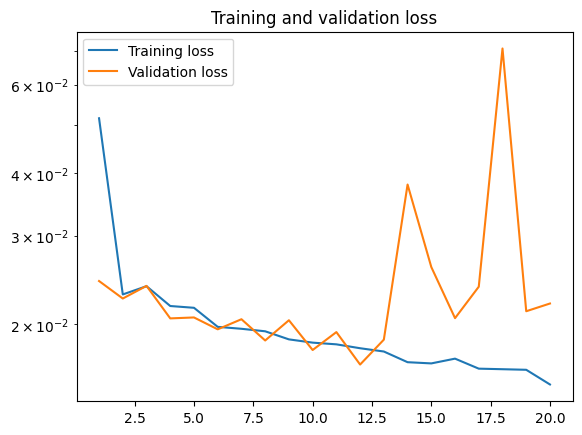

In [69]:
training_unet(path_save_spectrogram, './weights', epochs=  20,batch_size=10)

In [70]:

    def magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, stftaudio_magnitude_db, stftaudio_phase):
        
        stftaudio_magnitude_rev = librosa.db_to_amplitude(stftaudio_magnitude_db, ref=1.0)

        audio_reverse_stft = stftaudio_magnitude_rev * stftaudio_phase
        audio_reconstruct = librosa.core.istft(audio_reverse_stft, hop_length=hop_length_fft, length=frame_length)

        return audio_reconstruct


    def matrix_spectrogram_to_numpy_audio(m_mag_db, m_phase, frame_length, hop_length_fft)  :
        

        list_audio = []

        nb_spec = m_mag_db.shape[0]

        for i in range(nb_spec):

            audio_reconstruct = magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, m_mag_db[i], m_phase[i])
            list_audio.append(audio_reconstruct)

        return np.vstack(list_audio)

    def inv_scaled_ou(matrix_spec):
    
        matrix_spec = matrix_spec * 82 + 6
        return matrix_spec


In [71]:
import librosa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import model_from_json
import soundfile as sf

def prediction(weights_path, audio_dir_prediction, dir_save_prediction, audio_input_prediction,
audio_output_prediction):
   

    
    json_file = open('weightsmodel_unet.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    
    loaded_model.load_weights('weights/model_unet_best.keras')
    print("Loaded model from disk")

    
    audio = audio_files_to_numpy(audio_dir_prediction, audio_input_prediction, sample_rate,
                                 frame_length, hop_length_frame, min_duration)

    
    dim_square_spec = int(n_fft / 2) + 1
    print(dim_square_spec)

    
    m_amp_db_audio,  m_pha_audio = numpy_audio_to_matrix_spectrogram(
        audio, dim_square_spec, n_fft, hop_length_fft)

    
    X_in = scaled_in(m_amp_db_audio)
   
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    
    X_pred = loaded_model.predict(X_in)
    
    inv_sca_X_pred = inv_scaled_ou(X_pred)
    
    X_denoise = m_amp_db_audio - inv_sca_X_pred[:,:,:,0]
    
    print(X_denoise.shape)
    print(m_pha_audio.shape)
    print(frame_length)
    print(hop_length_fft)
    audio_denoise_recons = matrix_spectrogram_to_numpy_audio(X_denoise, m_pha_audio, frame_length, hop_length_fft)
   
    nb_samples = audio_denoise_recons.shape[0]
    
    denoise_long = audio_denoise_recons.reshape(1, nb_samples * frame_length)*10
    
    sf.write(dir_save_prediction + audio_output_prediction, denoise_long[0, :], 8000, 'PCM_24')
    

In [72]:
def amplify(path):
  song = AudioSegment.from_wav(song)
  
  louder = song+10
  louder.export(path+".wav")

In [73]:

from IPython.display import Audio
Audio('test/1.wav')

In [74]:
import os
import soundfile as sf


if not os.path.exists('Speech_Enhancement'):
    os.makedirs('Speech_Enhancement')


audio_dir_prediction = 'test'
dir_save_prediction = 'output/'    
audio_input_prediction = ['1.wav'] 
audio_output_prediction = 'denoise_audio.wav'


prediction('weights', audio_dir_prediction, dir_save_prediction, audio_input_prediction, audio_output_prediction)


Loaded model from disk
128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
(3, 128, 128)
(3, 128, 128)
8064
63


In [75]:
audio_dir_prediction = 'test'
dir_save_prediction = 'output/'  
audio_input_prediction = ['song1.wav']  
audio_output_prediction = 'denoise_audio2.wav'


prediction('weights', audio_dir_prediction, dir_save_prediction, audio_input_prediction, audio_output_prediction)

Loaded model from disk
128
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step
(195, 128, 128)
(195, 128, 128)
8064
63


In [76]:
audio_dir_prediction = 'test'
dir_save_prediction = 'poojithtest/'  
audio_input_prediction = ['voice.wav']  
audio_output_prediction = 'denoise_audio3.wav'


prediction('weights', audio_dir_prediction, dir_save_prediction, audio_input_prediction, audio_output_prediction)

Loaded model from disk
128
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FC33173D80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 422ms/step
(78, 128, 128)
(78, 128, 128)
8064
63


In [77]:
audio_dir_prediction = 'test'
dir_save_prediction = 'output/'  
audio_input_prediction = ['noisy_1_SNR_0.0.wav']  
audio_output_prediction = 'denoise_audio3.wav'


prediction('weights', audio_dir_prediction, dir_save_prediction, audio_input_prediction, audio_output_prediction)

Loaded model from disk
128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
(9, 128, 128)
(9, 128, 128)
8064
63
